## Import Packages

In [1]:
# Import all packages for Metpy

from datetime import datetime, timedelta

import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Notice that we will use "plt" to access matplotlib
import matplotlib.pyplot as plt

import metpy.calc as mpcalc
import metpy.plots as mpplots

import numpy as np

from io import StringIO
from metpy.io import parse_metar_file
from metpy.units import pandas_dataframe_to_unit_arrays
from matplotlib.patheffects import withStroke
from metpy.cbook import get_test_data

# Here is where we import the TDSCatalog class from siphon for obtaining our data 
from siphon.catalog import TDSCatalog

In [2]:
# Import all Pandas packages for Analyzing data frames
import pandas as pd
from matplotlib import pyplot as plt
from numpy.fft import fft, ifft

In [3]:
# Define Date Time
dt = datetime.utcnow() - timedelta(days=2)

# Import and Format Raw Data

## Pollution Data

In [4]:
# Combine all Pollution data into one csv file
Air_pollution_csv = ['https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/Brownsville.csv',
                     'https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/Corpus_Christi_Tulos.csv',
                     'https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/Corpus_Christi_West_pt_1.csv',
                     'https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/Corpus_Christi_West_pt_2.csv',
                     'https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/Laredo_pt_1.csv',
                     'https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/Laredo_pt_2.csv',
                     'https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/McAllen_pt_1.csv',
                     'https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/McAllen_pt_2.csv']

In [5]:
# Create Pandas Dataframe of data
Tx_Air_Pollution =  pd.concat([pd.read_csv(f,parse_dates = ["utc"]) for f in Air_pollution_csv]).rename(columns={"utc":"date time"})

In [6]:
# Display Pollution Data
Tx_Air_Pollution.head()

,locationId,location,city,country,date time,local,parameter,value,unit,latitude,longitude
0,833,Brownsville C80,Brownsville-Harlingen,US,2018-01-05 16:00:00+00:00,2018-01-05T10:00:00-06:00,o3,0.042,ppm,25.8925,-97.4936
1,833,Brownsville C80,Brownsville-Harlingen,US,2018-01-05 01:00:00+00:00,2018-01-04T19:00:00-06:00,o3,0.028,ppm,25.8925,-97.4936
2,833,Brownsville C80,Brownsville-Harlingen,US,2018-01-05 00:00:00+00:00,2018-01-04T18:00:00-06:00,o3,0.036,ppm,25.8925,-97.4936
3,833,Brownsville C80,Brownsville-Harlingen,US,2018-01-04 18:00:00+00:00,2018-01-04T12:00:00-06:00,o3,0.040,ppm,25.8925,-97.4936
4,833,Brownsville C80,Brownsville-Harlingen,US,2018-01-04 13:00:00+00:00,2018-01-04T07:00:00-06:00,o3,0.004,ppm,25.8925,-97.4936


In [7]:
# Information of the dataframe
Tx_Air_Pollution.info

<bound method DataFrame.info of       locationId         location                      city country  \
0            833  Brownsville C80     Brownsville-Harlingen      US   
1            833  Brownsville C80     Brownsville-Harlingen      US   
2            833  Brownsville C80     Brownsville-Harlingen      US   
3            833  Brownsville C80     Brownsville-Harlingen      US   
4            833  Brownsville C80     Brownsville-Harlingen      US   
...          ...              ...                       ...     ...   
2031        1813      Mission C43  McAllen-Edinburg-Mission      US   
2032        1813      Mission C43  McAllen-Edinburg-Mission      US   
2033        1813      Mission C43  McAllen-Edinburg-Mission      US   
2034        1813      Mission C43  McAllen-Edinburg-Mission      US   
2035        1813      Mission C43  McAllen-Edinburg-Mission      US   

                     date time                      local parameter  value  \
0    2018-01-05 16:00:00+00:00  2018-

In [8]:
# Output pandas dataframe
#Tx_Air_Pollution.to_csv("Tx_Air_Pollution.csv")

In [9]:
# Obtain unique values of locations in DF

Tx_Air_Pollution['location'].unique()

array(['Brownsville C80', 'Corpus Christi Tulos', 'Corpus Christi West',
       'Laredo C44', 'Mission C43'], dtype=object)

In [10]:
# Seperate Data

Brownsville = Tx_Air_Pollution.loc[Tx_Air_Pollution['location']=='Brownsville C80', ['date time','parameter','value','unit']]
Corpus_Christi_Tulos = Tx_Air_Pollution.loc[Tx_Air_Pollution['location']=='Corpus Christi Tulos', ['date time','parameter','value','unit']]
Corpus_Christi_West = Tx_Air_Pollution.loc[Tx_Air_Pollution['location']=='Corpus Christi West', ['date time','parameter','value','unit']]
Laredo = Tx_Air_Pollution.loc[Tx_Air_Pollution['location']=='Laredo C44', ['date time','parameter','value','unit']]
Mission = Tx_Air_Pollution.loc[Tx_Air_Pollution['location']=='Mission C43', ['date time','parameter','value','unit']]

# Combine Corpus Christi Locations
Corpus_Christi = pd.concat([Corpus_Christi_Tulos, Corpus_Christi_West])

#
Brownsville.head()

,date time,parameter,value,unit
0,2018-01-05 16:00:00+00:00,o3,0.042,ppm
1,2018-01-05 01:00:00+00:00,o3,0.028,ppm
2,2018-01-05 00:00:00+00:00,o3,0.036,ppm
3,2018-01-04 18:00:00+00:00,o3,0.040,ppm
4,2018-01-04 13:00:00+00:00,o3,0.004,ppm


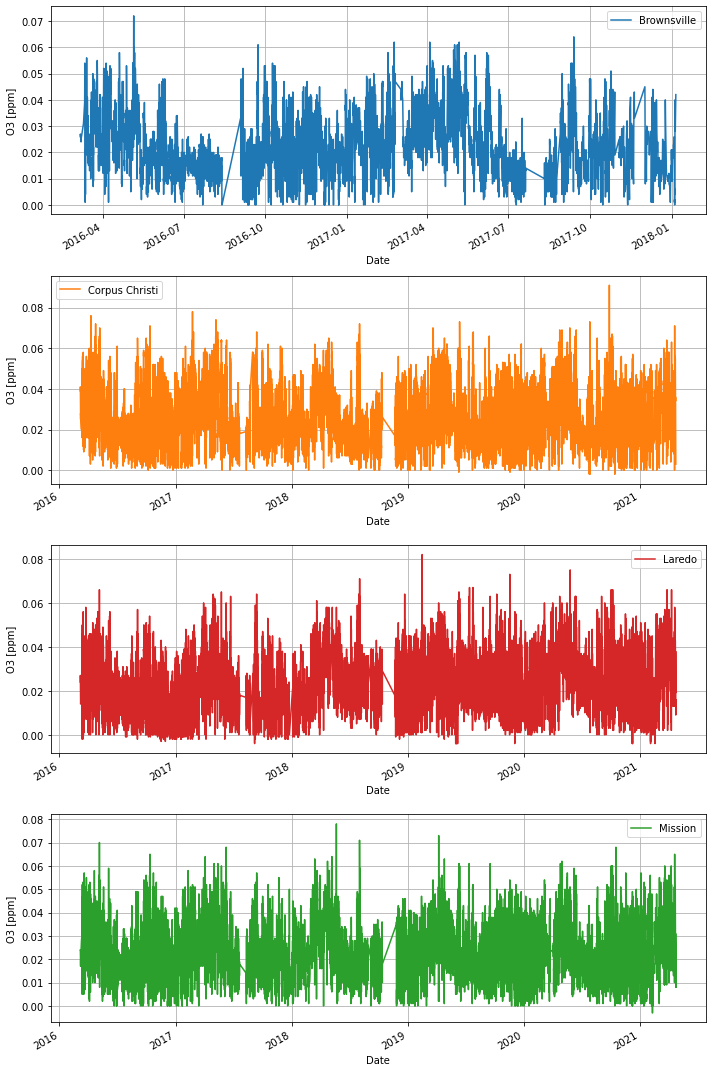

In [11]:
# Visualize data using plots

figure, axes = plt.subplots(nrows = 4,ncols=1)
Brownsville.plot(x="date time",y = "value" , xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                 figsize = (10,15), label = "Brownsville" , ax = axes[0])

Corpus_Christi.plot(x="date time",y = "value" , xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                 figsize = (10,15), label = "Corpus Christi", ax = axes[1], color = 'tab:orange' )

Laredo.plot(x="date time",y = "value" , xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                 figsize = (10,15), label = "Laredo", ax = axes[2], color = 'tab:red' )

Mission.plot(x="date time",y = "value" , xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                 figsize = (10,15), label = "Mission", ax = axes[3], color = 'tab:green' )

figure.tight_layout()


In [12]:
# Group data by Year and month means
# This will clean up data

Brownsville_sep = Brownsville.groupby([(Brownsville['date time'].dt.year), 
                                       (Brownsville['date time'].dt.month)]).agg({'value' : ['mean']}).rename_axis(["Year","Month"])

Corpus_Christi_sep = Corpus_Christi.groupby([(Corpus_Christi['date time'].dt.year), 
                                       (Corpus_Christi['date time'].dt.month)]).agg({'value' : ['mean']}).rename_axis(["Year","Month"])

Laredo_sep = Laredo.groupby([(Laredo['date time'].dt.year), 
                                       (Laredo['date time'].dt.month)]).agg({'value' : ['mean']}).rename_axis(["Year","Month"])

Mission_sep = Mission.groupby([(Mission['date time'].dt.year), 
                                       (Mission['date time'].dt.month)]).agg({'value' : ['mean']}).rename_axis(["Year","Month"])
# See New Data look
Brownsville_sep


value
                mean
Year Month          
2016 3      0.029520
     4      0.029519
     5      0.024241
     6      0.019060
     7      0.016193
     8      0.013621
     9      0.019149
     10     0.023955
     11     0.024016
     12     0.018722
2017 1      0.026063
     2      0.026484
     3      0.030870
     4      0.033817
     5      0.031914
     6      0.021316
     7      0.012392
     8      0.015909
     9      0.025462
     10     0.022865
     11     0.021569
     12     0.017727
2018 1      0.016744

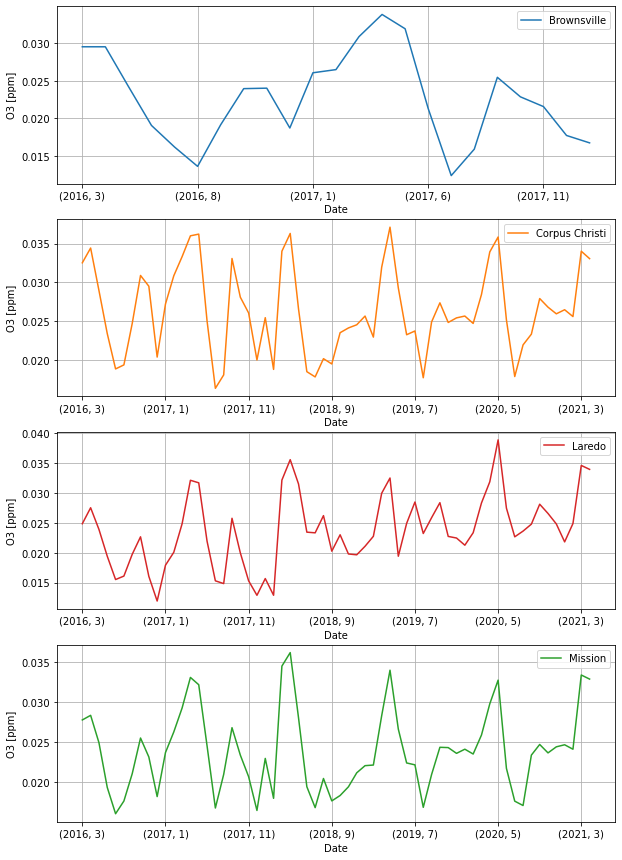

In [13]:
# New Visualized Data 
figure, axes = plt.subplots(nrows = 4,ncols=1)
Brownsville_sep.plot(xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                     figsize = (10,15), ax = axes[0]).legend(["Brownsville"])
Corpus_Christi_sep.plot(xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                     figsize = (10,15), ax = axes[1], color = 'tab:orange').legend(["Corpus Christi"])
Laredo_sep.plot(xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                     figsize = (10,15),  ax = axes[2], color = 'tab:red').legend(["Laredo"])
Mission_sep.plot(xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                     figsize = (10,15), ax = axes[3], color = 'tab:green').legend(["Mission"])


In [14]:
# Apply above plots to the complete Tx Pollution data set
# This data set is the combination of the four locations above

Tx_Air_sep = Tx_Air_Pollution.groupby([(Tx_Air_Pollution['date time'].dt.year), 
                                       (Tx_Air_Pollution['date time'].dt.month)
                                       ]).agg({'value' : ['mean']}).rename_axis(["Year","Month"])

# Visualize New Data Frame
Tx_Air_sep

value
                mean
Year Month          
2016 3      0.029456
     4      0.030847
     5      0.026165
     6      0.020936
     7      0.017127
...              ...
2020 12     0.025304
2021 1      0.024866
     2      0.025057
     3      0.034011
     4      0.033243

[62 rows x 1 columns]

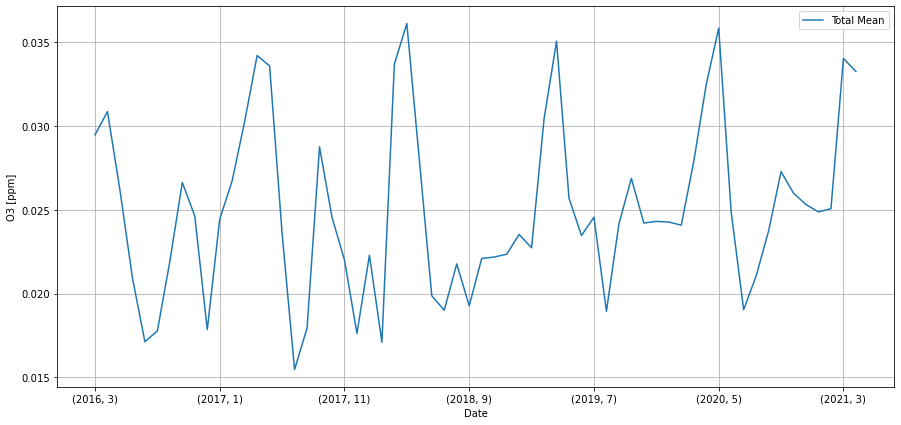

In [15]:
# Plot the Formatted Data

Tx_Air_sep.plot(xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                     figsize = (15,7)).legend(["Total Mean"])

## Solar Irradiance Data

In [16]:
# Convert .txt to csv format for pandas
Range1 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/2015_to_2016.txt" )
Range2 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/2017_to_2018.txt")
Range3 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/2019_to_2020.txt")
Range4 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/2021_to_current.txt")

# Combine all data into one pandas dataframe
Solar_irradiance = pd.concat([Range1, Range2, Range3, Range4])


In [17]:
# Make sure data looks good
Solar_irradiance.head()

,DATE (MM/DD/YYYY),HOUR-CST,Avg Global Horizontal [W/m^2],Avg Direct Normal [W/m^2],Avg Diffuse Horizontal [W/m^2],Avg Air Temperature [deg C],Avg Relative Humidity [%],Avg Avg Wind Speed @ 10m [m/s]
0,1/1/2015,1,-1.5128,0.0015,-1.7217,-99999.0,-99999.0,-99999.0
1,1/1/2015,2,-1.5068,0.0000,-1.4733,-99999.0,-99999.0,-99999.0
2,1/1/2015,3,-1.5280,0.0015,-1.4306,-99999.0,-99999.0,-99999.0
3,1/1/2015,4,-1.4508,0.0005,-1.4303,-99999.0,-99999.0,-99999.0
4,1/1/2015,5,-1.4732,0.0109,-1.4303,-99999.0,-99999.0,-99999.0


In [18]:
Solar_irradiance.info

<bound method DataFrame.info of      DATE (MM/DD/YYYY)  HOUR-CST  Avg Global Horizontal [W/m^2]  \
0             1/1/2015         1                        -1.5128   
1             1/1/2015         2                        -1.5068   
2             1/1/2015         3                        -1.5280   
3             1/1/2015         4                        -1.4508   
4             1/1/2015         5                        -1.4732   
...                ...       ...                            ...   
1592         4/13/2021        19                        34.5401   
1593         4/13/2021        20                        -1.5162   
1594         4/13/2021        21                        -1.6875   
1595         4/13/2021        22                        -1.6877   
1596         4/13/2021        23                        -1.6881   

      Avg Direct Normal [W/m^2]  Avg Diffuse Horizontal [W/m^2]  \
0                        0.0015                         -1.7217   
1                        0.00

In [19]:
# Output data for use in other code
#Solar_irradiance.to_csv("Solar_irradiance.csv")

In [20]:
# List the Header Names for analysis

Solar_irradiance.columns.values

array(['DATE (MM/DD/YYYY)', 'HOUR-CST', 'Avg Global Horizontal [W/m^2]',
       'Avg Direct Normal [W/m^2]', 'Avg Diffuse Horizontal [W/m^2]',
       'Avg Air Temperature [deg C]', 'Avg Relative Humidity [%]',
       'Avg Avg Wind Speed @ 10m [m/s]'], dtype=object)

In [21]:
# Format Date into Date time format 

Solar_irradiance['DATE (MM/DD/YYYY)'] = pd.to_datetime(Solar_irradiance['DATE (MM/DD/YYYY)'] , format='%m/%d/%Y')
Solar_irradiance

,DATE (MM/DD/YYYY),HOUR-CST,Avg Global Horizontal [W/m^2],Avg Direct Normal [W/m^2],Avg Diffuse Horizontal [W/m^2],Avg Air Temperature [deg C],Avg Relative Humidity [%],Avg Avg Wind Speed @ 10m [m/s]
0,2015-01-01,1,-1.5128,0.0015,-1.7217,-99999.0000,-99999.0000,-99999.0000
1,2015-01-01,2,-1.5068,0.0000,-1.4733,-99999.0000,-99999.0000,-99999.0000
2,2015-01-01,3,-1.5280,0.0015,-1.4306,-99999.0000,-99999.0000,-99999.0000
3,2015-01-01,4,-1.4508,0.0005,-1.4303,-99999.0000,-99999.0000,-99999.0000
4,2015-01-01,5,-1.4732,0.0109,-1.4303,-99999.0000,-99999.0000,-99999.0000
...,...,...,...,...,...,...,...,...
1592,2021-04-13,19,34.5401,0.2749,34.8981,28.2473,72.3773,2.9837
1593,2021-04-13,20,-1.5162,-0.3816,-2.2068,27.3743,75.1110,2.3850
1594,2021-04-13,21,-1.6875,-0.3817,-2.4226,26.5663,76.9167,2.6495
1595,2021-04-13,22,-1.6877,-0.3817,-2.2229,25.5898,79.9210,1.7510


In [22]:
# Filter Data out

filter1 = Solar_irradiance.iloc[:,2:8]> -10
Solar_irradiance.where(filter1, inplace = True)

# Output filtered data
Solar_irradiance

,DATE (MM/DD/YYYY),HOUR-CST,Avg Global Horizontal [W/m^2],Avg Direct Normal [W/m^2],Avg Diffuse Horizontal [W/m^2],Avg Air Temperature [deg C],Avg Relative Humidity [%],Avg Avg Wind Speed @ 10m [m/s]
0,2015-01-01,1,-1.5128,0.0015,-1.7217,NaN,NaN,NaN
1,2015-01-01,2,-1.5068,0.0000,-1.4733,NaN,NaN,NaN
2,2015-01-01,3,-1.5280,0.0015,-1.4306,NaN,NaN,NaN
3,2015-01-01,4,-1.4508,0.0005,-1.4303,NaN,NaN,NaN
4,2015-01-01,5,-1.4732,0.0109,-1.4303,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1592,2021-04-13,19,34.5401,0.2749,34.8981,28.2473,72.3773,2.9837
1593,2021-04-13,20,-1.5162,-0.3816,-2.2068,27.3743,75.1110,2.3850
1594,2021-04-13,21,-1.6875,-0.3817,-2.4226,26.5663,76.9167,2.6495
1595,2021-04-13,22,-1.6877,-0.3817,-2.2229,25.5898,79.9210,1.7510


<AxesSubplot:xlabel='DATE (MM/DD/YYYY)', ylabel='Avg. Diffuse Horizontal [W/m^2]'>

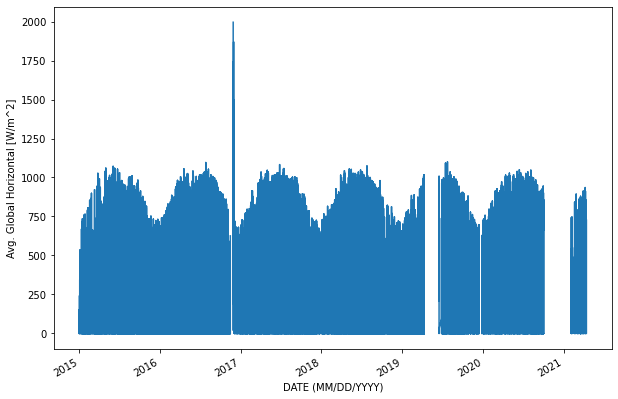

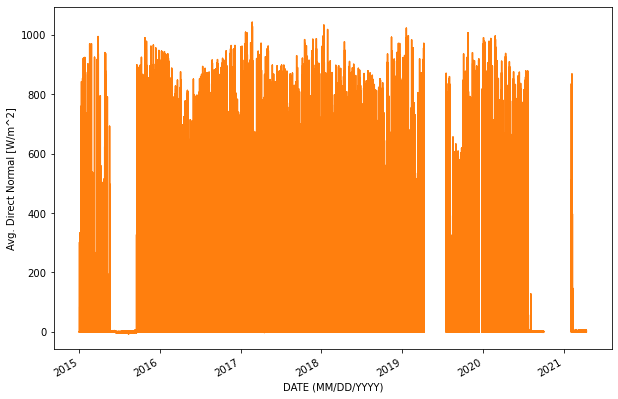

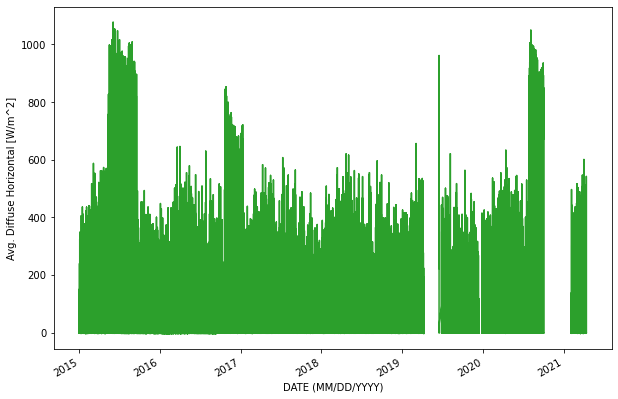

In [23]:
# Visualize Data

Solar_irradiance.plot(x="DATE (MM/DD/YYYY)" , y = "Avg Global Horizontal [W/m^2]" ,  ylabel = 'Avg. Global Horizontal [W/m^2]',
                      figsize = (10,7), legend = False)
Solar_irradiance.plot(x="DATE (MM/DD/YYYY)" , y = "Avg Direct Normal [W/m^2]" ,   ylabel = 'Avg. Direct Normal [W/m^2]',
                      figsize = (10,7), legend = False , color = 'tab:orange')
Solar_irradiance.plot(x="DATE (MM/DD/YYYY)" , y = "Avg Diffuse Horizontal [W/m^2]" ,   ylabel = 'Avg. Diffuse Horizontal [W/m^2]',
                      figsize = (10,7), legend = False , color = 'tab:green')


In [24]:
# Clean up data by grouping by Monthly average per year

Avg_Global_Hor = Solar_irradiance.groupby([(Solar_irradiance['DATE (MM/DD/YYYY)'].dt.year), 
                                                 (Solar_irradiance['DATE (MM/DD/YYYY)'].dt.month)
                                                ]).agg({'Avg Global Horizontal [W/m^2]' : ['mean']}).rename_axis(["Year","Month"])
Avg_Direct_Nor = Solar_irradiance.groupby([(Solar_irradiance['DATE (MM/DD/YYYY)'].dt.year), 
                                                 (Solar_irradiance['DATE (MM/DD/YYYY)'].dt.month)
                                                ]).agg({'Avg Direct Normal [W/m^2]' : ['mean']}).rename_axis(["Year","Month"])
Avg_Diffuse_Hor = Solar_irradiance.groupby([(Solar_irradiance['DATE (MM/DD/YYYY)'].dt.year), 
                                                 (Solar_irradiance['DATE (MM/DD/YYYY)'].dt.month)
                                                ]).agg({'Avg Diffuse Horizontal [W/m^2]' : ['mean']}).rename_axis(["Year","Month"])



(0.0, 350.0)

<Figure size 432x288 with 0 Axes>

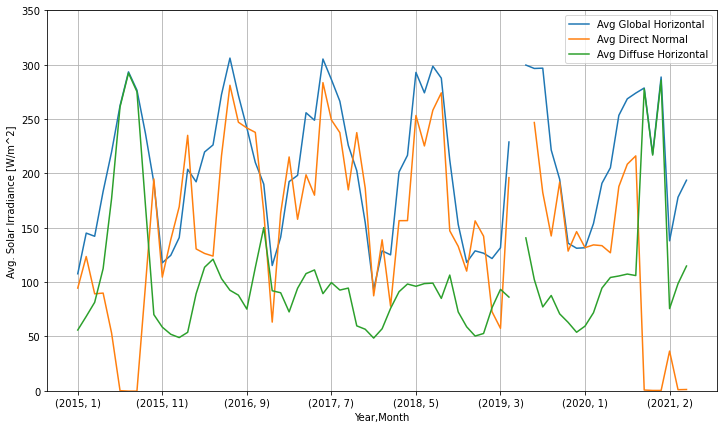

In [25]:
plt.figure();
ax = Avg_Global_Hor.plot(ylabel = 'Avg. Solar Irradiance [W/m^2]',
                      figsize = (12,7), legend = False)

Avg_Direct_Nor.plot(color = 'tab:orange', ax = ax , legend = False)
Avg_Diffuse_Hor.plot(legend = False , color = 'tab:green' , ax = ax , grid = True)
ax.get_legend_handles_labels()
ax.legend([('Avg Global Horizontal'), ('Avg Direct Normal'), ('Avg Diffuse Horizontal')])
plt.ylim([0,350])
                                                                                            

## Meterological Data 

In [26]:
# Load Header Data

#Metar_header = pd.read_csv('HEADERS.txt', sep=" ", header = [1,2])
Metar_header = pd.read_csv('https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/HEADERS.txt', sep=" ", header = None)
Metar_header.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,NaN
1,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY,NaN
2,XXXXX,YYYYMMDD,XXXXXX,Decimal_degrees,Decimal_degrees,Celsius,Celsius,Celsius,Celsius,mm,...,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,Celsius,Celsius,Celsius,Celsius,Celsius,NaN


In [27]:
# Eliminate Last column of bad data

Metar_header = Metar_header.iloc[:, :28]
Metar_header.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
1,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
2,XXXXX,YYYYMMDD,XXXXXX,Decimal_degrees,Decimal_degrees,Celsius,Celsius,Celsius,Celsius,mm,...,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,Celsius,Celsius,Celsius,Celsius,Celsius


In [28]:
# Load all Metar data and read as pd DF

Metar1 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/CRND0103-2010-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar2 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/CRND0103-2011-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar3 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/CRND0103-2012-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar4 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/CRND0103-2013-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar5 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/CRND0103-2014-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar6 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/CRND0103-2015-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar7 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/CRND0103-2016-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar8 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/CRND0103-2017-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar9 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/CRND0103-2018-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar10 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/CRND0103-2019-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar11 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Final-Project-Big-Data-Analysis/All-Data/CRND0103-2020-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')

Edinburg_Metar = pd.concat([Metar_header, Metar1, Metar2, Metar3, Metar4, Metar5, Metar6, Metar7, Metar8, Metar9, Metar10, Metar11])
Edinburg_Metar.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
1,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
2,XXXXX,YYYYMMDD,XXXXXX,Decimal_degrees,Decimal_degrees,Celsius,Celsius,Celsius,Celsius,mm,...,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,Celsius,Celsius,Celsius,Celsius,Celsius
0,12987,20100101,1.302,-98.06,26.53,15.0,4.1,9.6,9.6,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,12987,20100102,1.302,-98.06,26.53,20.5,2.0,11.3,11.2,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [29]:
# Format Header for Data Frame

Edinburg_Metar.columns = pd.MultiIndex.from_arrays([Edinburg_Metar.iloc[1],Edinburg_Metar.iloc[2]])
Edinburg_Metar = Edinburg_Metar.iloc[3:].reset_index(drop=True)

Edinburg_Metar.head()

1,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
2,XXXXX,YYYYMMDD,XXXXXX,Decimal_degrees,Decimal_degrees,Celsius,Celsius,Celsius,Celsius,mm,...,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,Celsius,Celsius,Celsius,Celsius,Celsius
0,12987,20100101,1.302,-98.06,26.53,15.0,4.1,9.6,9.6,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,12987,20100102,1.302,-98.06,26.53,20.5,2.0,11.3,11.2,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,12987,20100103,1.302,-98.06,26.53,17.7,11.7,14.7,14.1,0.5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,12987,20100104,1.302,-98.06,26.53,15.2,4.6,9.9,10.4,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,12987,20100105,1.302,-98.06,26.53,14.6,2.8,8.7,8.6,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [30]:
# Information about data
Edinburg_Metar.info

<bound method DataFrame.info of 1    WBANNO  LST_DATE CRX_VN       LONGITUDE        LATITUDE T_DAILY_MAX  \
2     XXXXX  YYYYMMDD XXXXXX Decimal_degrees Decimal_degrees     Celsius   
0     12987  20100101  1.302          -98.06           26.53        15.0   
1     12987  20100102  1.302          -98.06           26.53        20.5   
2     12987  20100103  1.302          -98.06           26.53        17.7   
3     12987  20100104  1.302          -98.06           26.53        15.2   
4     12987  20100105  1.302          -98.06           26.53        14.6   
...     ...       ...    ...             ...             ...         ...   
4013  12987  20201227  2.622          -98.06           26.53     -9999.0   
4014  12987  20201228  2.622          -98.06           26.53     -9999.0   
4015  12987  20201229  2.622          -98.06           26.53     -9999.0   
4016  12987  20201230  2.622          -98.06           26.53     -9999.0   
4017  12987  20201231  2.622          -98.06           2

In [31]:
# Understand Column names for analysis
Edinburg_Metar.columns.values

array([('WBANNO', 'XXXXX'), ('LST_DATE', 'YYYYMMDD'),
       ('CRX_VN', 'XXXXXX'), ('LONGITUDE', 'Decimal_degrees'),
       ('LATITUDE', 'Decimal_degrees'), ('T_DAILY_MAX', 'Celsius'),
       ('T_DAILY_MIN', 'Celsius'), ('T_DAILY_MEAN', 'Celsius'),
       ('T_DAILY_AVG', 'Celsius'), ('P_DAILY_CALC', 'mm'),
       ('SOLARAD_DAILY', 'MJ/m^2'), ('SUR_TEMP_DAILY_TYPE', 'X'),
       ('SUR_TEMP_DAILY_MAX', 'Celsius'),
       ('SUR_TEMP_DAILY_MIN', 'Celsius'),
       ('SUR_TEMP_DAILY_AVG', 'Celsius'), ('RH_DAILY_MAX', '%'),
       ('RH_DAILY_MIN', '%'), ('RH_DAILY_AVG', '%'),
       ('SOIL_MOISTURE_5_DAILY', 'm^3/m^3'),
       ('SOIL_MOISTURE_10_DAILY', 'm^3/m^3'),
       ('SOIL_MOISTURE_20_DAILY', 'm^3/m^3'),
       ('SOIL_MOISTURE_50_DAILY', 'm^3/m^3'),
       ('SOIL_MOISTURE_100_DAILY', 'm^3/m^3'),
       ('SOIL_TEMP_5_DAILY', 'Celsius'),
       ('SOIL_TEMP_10_DAILY', 'Celsius'),
       ('SOIL_TEMP_20_DAILY', 'Celsius'),
       ('SOIL_TEMP_50_DAILY', 'Celsius'),
       ('SOIL_TEMP_100_DAIL

In [32]:
# Format Date into Date time format 

Edinburg_Metar[('LST_DATE', 'YYYYMMDD')] = pd.to_datetime(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')] , format='%Y%m%d')
Edinburg_Metar

1,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
2,XXXXX,YYYYMMDD,XXXXXX,Decimal_degrees,Decimal_degrees,Celsius,Celsius,Celsius,Celsius,mm,...,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,Celsius,Celsius,Celsius,Celsius,Celsius
0,12987,2010-01-01,1.302,-98.06,26.53,15.0,4.1,9.6,9.6,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,12987,2010-01-02,1.302,-98.06,26.53,20.5,2.0,11.3,11.2,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,12987,2010-01-03,1.302,-98.06,26.53,17.7,11.7,14.7,14.1,0.5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,12987,2010-01-04,1.302,-98.06,26.53,15.2,4.6,9.9,10.4,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,12987,2010-01-05,1.302,-98.06,26.53,14.6,2.8,8.7,8.6,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,12987,2020-12-27,2.622,-98.06,26.53,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4014,12987,2020-12-28,2.622,-98.06,26.53,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4015,12987,2020-12-29,2.622,-98.06,26.53,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [33]:
# Filter Data out

Edinburg_Metar = Edinburg_Metar.iloc[:, 0:11]

filter1 = Edinburg_Metar.iloc[:,5:11]> -10
Edinburg_Metar.where(filter1, inplace = True)

# Output filtered data
Edinburg_Metar

1,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY
2,XXXXX,YYYYMMDD,XXXXXX,Decimal_degrees,Decimal_degrees,Celsius,Celsius,Celsius,Celsius,mm,MJ/m^2
0,12987,2010-01-01,1.302,-98.06,26.53,15.0,4.1,9.6,9.6,0.0,16.49
1,12987,2010-01-02,1.302,-98.06,26.53,20.5,2.0,11.3,11.2,0.0,14.54
2,12987,2010-01-03,1.302,-98.06,26.53,17.7,11.7,14.7,14.1,0.5,3.49
3,12987,2010-01-04,1.302,-98.06,26.53,15.2,4.6,9.9,10.4,0.0,11.78
4,12987,2010-01-05,1.302,-98.06,26.53,14.6,2.8,8.7,8.6,0.0,9.79
...,...,...,...,...,...,...,...,...,...,...,...
4013,12987,2020-12-27,2.622,-98.06,26.53,NaN,NaN,NaN,NaN,NaN,NaN
4014,12987,2020-12-28,2.622,-98.06,26.53,NaN,NaN,NaN,NaN,NaN,NaN
4015,12987,2020-12-29,2.622,-98.06,26.53,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# See the Data types of the file
# It apears that all data is an object this must be changed in order to continue working with data

Edinburg_Metar.dtypes

1              2              
WBANNO         XXXXX                      object
LST_DATE       YYYYMMDD           datetime64[ns]
CRX_VN         XXXXXX                     object
LONGITUDE      Decimal_degrees            object
LATITUDE       Decimal_degrees            object
T_DAILY_MAX    Celsius                    object
T_DAILY_MIN    Celsius                    object
T_DAILY_MEAN   Celsius                    object
T_DAILY_AVG    Celsius                    object
P_DAILY_CALC   mm                         object
SOLARAD_DAILY  MJ/m^2                     object
dtype: object

In [35]:
# We will only convert data we are interested in using for analysis

Edinburg_Metar[('T_DAILY_MEAN', 'Celsius')] = Edinburg_Metar[('T_DAILY_MEAN', 'Celsius')].astype(float, errors = 'raise')
Edinburg_Metar[('T_DAILY_MAX', 'Celsius')] = Edinburg_Metar[('T_DAILY_MAX', 'Celsius')].astype(float, errors = 'raise')
Edinburg_Metar[('T_DAILY_MIN', 'Celsius')] = Edinburg_Metar[('T_DAILY_MIN', 'Celsius')].astype(float, errors = 'raise')
Edinburg_Metar[('SOLARAD_DAILY', 'MJ/m^2')] = Edinburg_Metar[('SOLARAD_DAILY', 'MJ/m^2')].astype(float, errors = 'raise')

# Check data types now
# Looks like everything is in order for analysis
Edinburg_Metar.dtypes

1              2              
WBANNO         XXXXX                      object
LST_DATE       YYYYMMDD           datetime64[ns]
CRX_VN         XXXXXX                     object
LONGITUDE      Decimal_degrees            object
LATITUDE       Decimal_degrees            object
T_DAILY_MAX    Celsius                   float64
T_DAILY_MIN    Celsius                   float64
T_DAILY_MEAN   Celsius                   float64
T_DAILY_AVG    Celsius                    object
P_DAILY_CALC   mm                         object
SOLARAD_DAILY  MJ/m^2                    float64
dtype: object

<AxesSubplot:xlabel='(LST_DATE, YYYYMMDD)', ylabel='Solar Radiation Daily [MJ/m^2]'>

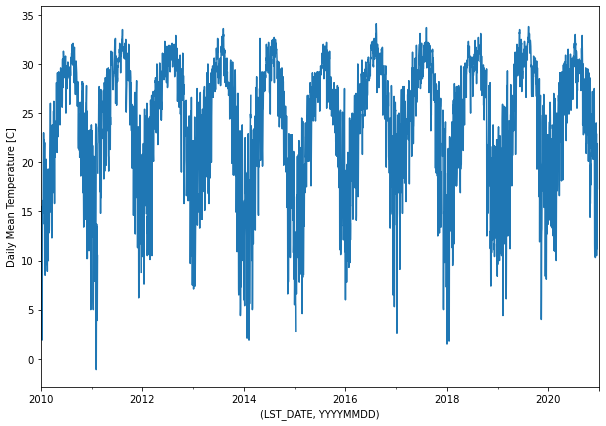

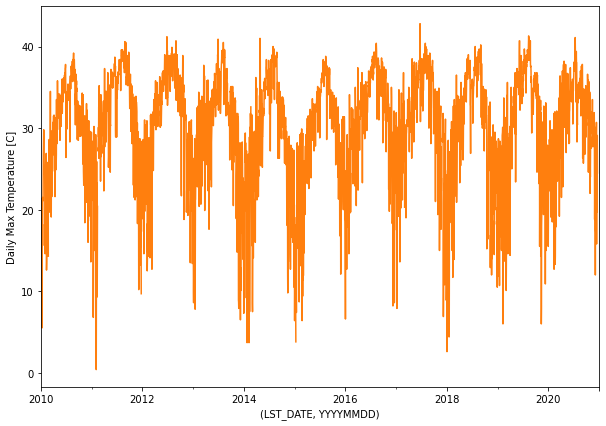

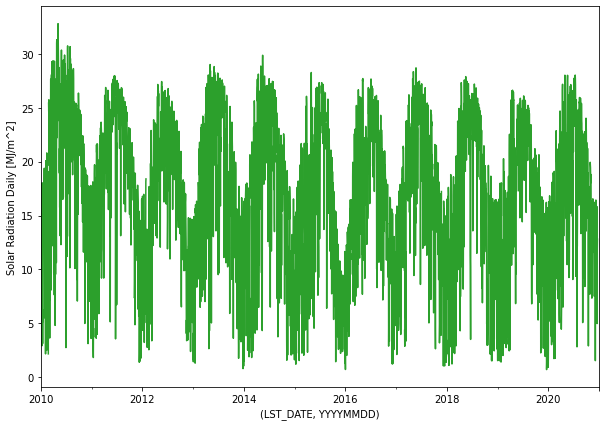

In [36]:
# Visualize Data

Edinburg_Metar.plot(x=('LST_DATE', 'YYYYMMDD') , y = ('T_DAILY_MEAN', 'Celsius'),  ylabel = 'Daily Mean Temperature [C]',
                      figsize = (10,7), legend = False)
Edinburg_Metar.plot(x=('LST_DATE', 'YYYYMMDD') , y = ('T_DAILY_MAX', 'Celsius'),  ylabel = 'Daily Max Temperature [C]',
                      figsize = (10,7), legend = False , color = 'tab:orange')
Edinburg_Metar.plot(x=('LST_DATE', 'YYYYMMDD') , y = ('SOLARAD_DAILY', 'MJ/m^2'),  ylabel = 'Solar Radiation Daily [MJ/m^2]',
                      figsize = (10,7), legend = False , color = 'tab:green')


In [37]:
# Clean up data by grouping by Monthly average per year

Avg_Daily_Temp = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.year), 
                                        (Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.month)
                                        ]).agg({('T_DAILY_MEAN', 'Celsius') : ['mean']}).rename_axis(["Year","Month"])

Avg_Max_Temp = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.year), 
                                        (Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.month)
                                        ]).agg({('T_DAILY_MAX', 'Celsius') : ['mean']}).rename_axis(["Year","Month"])

Avg_Min_Temp = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.year), 
                                        (Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.month)
                                        ]).agg({('T_DAILY_MIN', 'Celsius') : ['mean']}).rename_axis(["Year","Month"])

Avg_Solar_Rad = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.year), 
                                        (Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.month)
                                        ]).agg({('SOLARAD_DAILY', 'MJ/m^2') : ['mean']}).rename_axis(["Year","Month"])

Avg_Daily_Temp

T_DAILY_MEAN
                Celsius
                   mean
Year Month             
2010 1        14.370968
     2        14.233333
     3        18.751613
     4        23.213333
     5        27.135484
...                 ...
2020 8        29.641935
     9        26.806667
     10       24.267742
     11       22.286667
     12       15.845000

[132 rows x 1 columns]

Text(0.5, 1.0, 'Edinburg, Tx')

<Figure size 432x288 with 0 Axes>

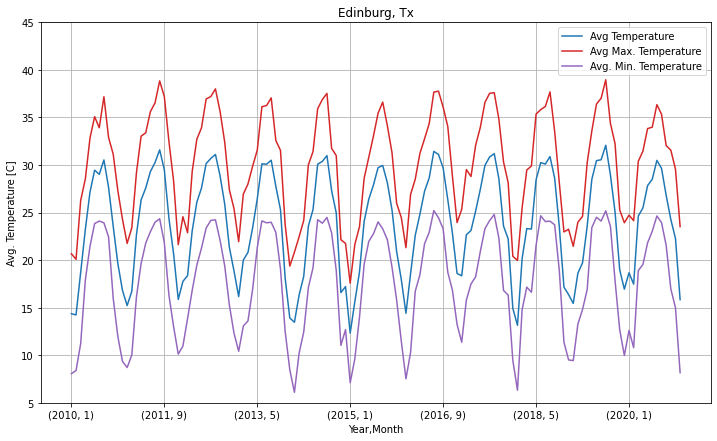

<Figure size 432x288 with 0 Axes>

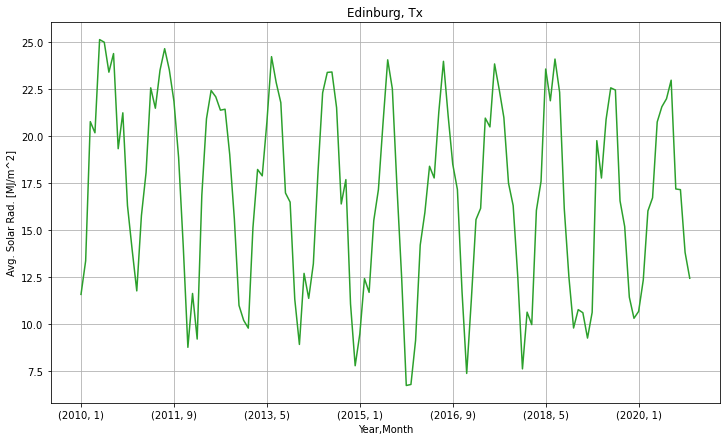

In [38]:
# Visualize Formatted Data

plt.figure()
ax = Avg_Daily_Temp.plot(ylabel = 'Avg. Temperature [C]', figsize = (12,7), legend = False)
Avg_Max_Temp.plot(color = 'tab:red', ax = ax , legend = False , grid = True)
Avg_Min_Temp.plot(color = 'tab:purple', ax = ax , legend = False , grid = True)
ax.legend([('Avg Temperature'), ('Avg Max. Temperature') , ('Avg. Min. Temperature')])
plt.ylim([5,45])
plt.title('Edinburg, Tx')

plt.figure()
Avg_Solar_Rad.plot(ylabel = 'Avg. Solar Rad. [MJ/m^2]', figsize = (12,7), legend = False , grid = True, color = 'tab:green')
plt.title('Edinburg, Tx')

## Analyze Data

# Satalite Imagery using METPY

## Satalite Data for Land Surface Temperature

In [39]:
# Use TDS catalog for data
sat_catalog_LST = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/products'
                         '/LandSurfaceTemperature/CONUS/current/catalog.xml')

In [40]:
list(sat_catalog_LST.datasets)[:5]

['OR_ABI-L2-LSTC-M6_G16_s20211240201167_e20211240203540_c20211240204369.nc',
 'OR_ABI-L2-LSTC-M6_G16_s20211240101168_e20211240103540_c20211240104375.nc',
 'OR_ABI-L2-LSTC-M6_G16_s20211240001168_e20211240003541_c20211240004404.nc',
 'OR_ABI-L2-LSTC-M6_G16_s20211232301168_e20211232303541_c20211232304390.nc',
 'OR_ABI-L2-LSTC-M6_G16_s20211232201168_e20211232203541_c20211232204392.nc']

In [41]:
# Display Date time
dt

datetime.datetime(2021, 5, 2, 2, 59, 15, 324002)

In [42]:
# Establish Satalite Date time
nearest_sat_time = dt.replace(minute = (dt.minute // 5 * 5) + 1)

In [43]:
# Display Satalite Date Time
nearest_sat_time

datetime.datetime(2021, 5, 2, 2, 56, 15, 324002)

In [44]:
# Create Time string
time_str = nearest_sat_time.strftime('s%Y%j%H%M160')

In [45]:
# Find Index that matches with date time
for i, dataset in enumerate(sat_catalog_LST.datasets):
     if time_str in dataset:
            sat_index = i
print(i)
sat_index = i

287


In [46]:
# Using above information about Index, pinpoint satalite data
sat_data_LST = sat_catalog_LST.datasets[sat_index].remote_access(use_xarray=True)

C:\Users\Diego\anaconda3\lib\site-packages\xarray\conventions.py:512: SerializationWarning: variable 'LST' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  new_vars[k] = decode_cf_variable(
C:\Users\Diego\anaconda3\lib\site-packages\xarray\conventions.py:512: SerializationWarning: variable 'DQF' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  new_vars[k] = decode_cf_variable(


In [47]:
# Info about satalite data
sat_data_LST.head()

<xarray.Dataset>
Dimensions:                                 (number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 5, y: 5)
Coordinates:
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.1282 0.1282 ... 0.128
  * x                                       (x) float32 -0.1013 ... -0.1011
    y_image                                 float32 ...
    x_image                                 float32 ...
    retrieval_local_zenith_angle            float32 ...
    quantitative_local_zenith_angle         float32 ...
    solar_zenith_angle                      float32 ...
Dimensions without coordinates: number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables: (12/25)
    LST                                     (y, x) float32 ...
    DQF                                     (y, x) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 ...
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    ...                                      ...
    standard_deviation_lst                  float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2021-04-22T00:01:14.7Z
    time_coverage_end:         2021-04-22T00:03:52.0Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        6e5b3dd3-49b8-4255-8ca9-cf5ec7cfa9c0

In [48]:
# Pull L.S.T. data from satalite data
LST = sat_data_LST.metpy.parse_cf("LST")

Land Surface Temperature Plot

Text(0.5, 1.0, '2021-05-02 02Z')

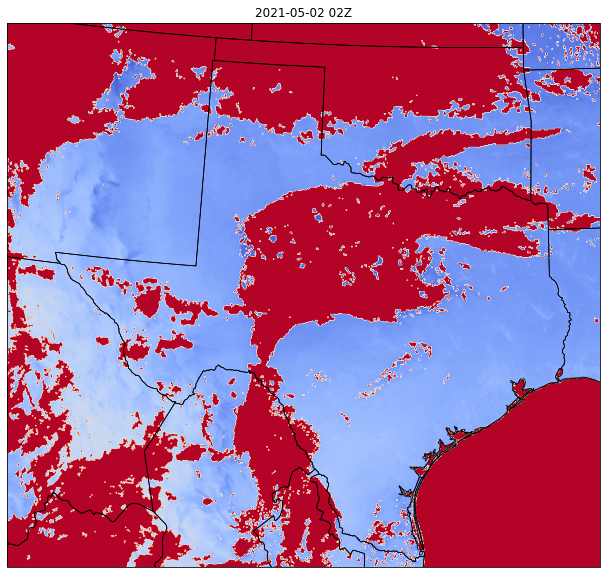

In [49]:
# Establish new figure with size
fig = plt.figure(figsize=(20,10))

# Format figure
ax = fig.add_subplot(1,1,1,projection = ccrs.LambertConformal())
ax.set_extent((-107,-93,25.7,37), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'),linewidth=0.75)
ax.add_feature(cfeature.STATES,linewidth=0.75)

# Satellite Land Surface Temperature
# Adjust the regrid_shape to about 100 so that code can run faster
image_extent = (LST.metpy.x[0], LST.metpy.x[-1], LST.metpy.y[0], LST.metpy.y[-1])
ax.imshow(LST, extent=image_extent, origin='lower', cmap='coolwarm',
          regrid_shape=1000, transform=LST.metpy.cartopy_crs)

plt.title(dt.strftime('%Y-%m-%d %HZ'))

# Save Figure into workbook
#plt.savefig("Land Surface Temperature.png")

## Satalite Data for Cloud and Moisture Images

In [50]:
# Use TDS catalog for Cloud and Moisture Images
sat_catalog_CMI = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/products/'
                             'CloudAndMoistureImagery/CONUS/Channel02/current/catalog.xml')

In [51]:
# Show data in catalog
list(sat_catalog_CMI.datasets)[:5]

['OR_ABI-L2-CMIPC-M6C02_G16_s20211240251160_e20211240251160_c20211240251160.nc',
 'OR_ABI-L2-CMIPC-M6C02_G16_s20211240246160_e20211240246160_c20211240246160.nc',
 'OR_ABI-L2-CMIPC-M6C02_G16_s20211240241160_e20211240241160_c20211240241160.nc',
 'OR_ABI-L2-CMIPC-M6C02_G16_s20211240236160_e20211240236160_c20211240236160.nc',
 'OR_ABI-L2-CMIPC-M6C02_G16_s20211240231160_e20211240231160_c20211240231160.nc']

In [52]:
# Similar to L.S.T. find index that correspods to date time
for i, dataset in enumerate(sat_catalog_CMI.datasets):
     if time_str in dataset:
            sat_index = i
print(i)
sat_index = i

287


In [53]:
# Find data that corresponds to index
sat_data_CMI = sat_catalog_CMI.datasets[sat_index].remote_access(use_xarray=True)

In [54]:
sat_data_CMI.head()

<xarray.Dataset>
Dimensions:               (x: 5, y: 5)
Coordinates:
    time                  datetime64[ns] ...
  * y                     (y) float32 1.282e+05 1.282e+05 ... 1.282e+05
  * x                     (x) float32 -1.014e+05 -1.013e+05 ... -1.013e+05
Data variables:
    Sectorized_CMI        (y, x) float32 ...
    fixedgrid_projection  int32 ...
Attributes: (12/30)
    title:                       Sectorized Cloud and Moisture Imagery for th...
    ICD_version:                 GROUND SEGMENT (GS) TO ADVANCED WEATHER INTE...
    Conventions:                 CF-1.6
    channel_id:                  2
    central_wavelength:          0.64
    abi_mode:                    6
    ...                          ...
    pixel_y_size:                0.5
    satellite_latitude:          0.0
    satellite_longitude:         -75.0
    satellite_altitude:          35786023.0
    created_by:                  ldm-alchemy
    product_tiles_received:      15

In [55]:
# Pull CMI data from satalite data
CMI = sat_data_CMI.metpy.parse_cf("Sectorized_CMI")

Plot Cloud and Moisture Image of Texas

Text(0.5, 1.0, '2021-05-02 02Z')

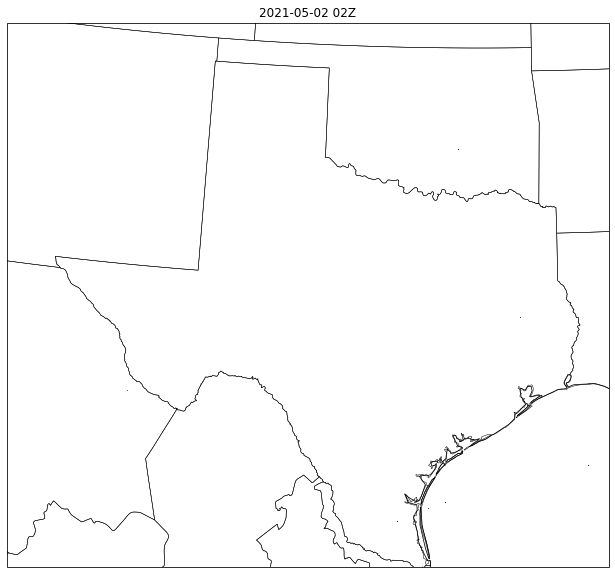

In [56]:
# Establish new figure with size
fig = plt.figure(figsize=(20,10))

# Format figure
ax = fig.add_subplot(1,1,1,projection= ccrs.LambertConformal())
ax.set_extent((-107,-93,25.9,37), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'),linewidth=0.75)
ax.add_feature(cfeature.STATES,linewidth=0.5)

# Satellite Cloud and Moisture Image data
# Adjust the regrid_shape to about 100 so that code can run faster
image_extent = (CMI.metpy.x[0], CMI.metpy.x[-1], CMI.metpy.y[0], CMI.metpy.y[-1])
ax.imshow(CMI, extent=image_extent, origin='lower', cmap='Greys_r',
          regrid_shape=1000, transform=CMI.metpy.cartopy_crs)

plt.title(dt.strftime('%Y-%m-%d %HZ'))

# Save Figure into workbook
#plt.savefig("Cloud Moisture Image.png")

## Real Time Data Analysis

In [57]:
# Obtain Real Time Data of Continental United States
rtma_cat = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RTMA/CONUS_2p5km/catalog.xml')
rtma_data = rtma_cat.datasets['Full Collection Dataset'].remote_access(use_xarray=True)
rtma_data = rtma_data.metpy.parse_cf()

In [58]:
# Obtain Pressure, Temperature, and Dewpoint Temp of Real Time Data
pres = rtma_data['Pressure_Analysis_surface'].metpy.sel(time=dt,method='nearest').squeeze()
temp = rtma_data['Temperature_Analysis_height_above_ground'].metpy.sel(time=dt,method='nearest').squeeze()
dewp = rtma_data['Dewpoint_temperature_Analysis_height_above_ground'].metpy.sel(time=dt,method='nearest').squeeze()

In [59]:
# Display information about one of the Variables
pres

<xarray.DataArray 'Pressure_Analysis_surface' (y: 1377, x: 2145)>
[2953665 values with dtype=float32]
Coordinates:
  * x          (x) float32 -2.763e+06 -2.761e+06 ... 2.679e+06 2.682e+06
  * y          (y) float32 -2.638e+05 -2.612e+05 ... 3.228e+06 3.231e+06
    metpy_crs  object Projection: lambert_conformal_conic
    time4      datetime64[ns] 2021-05-02T03:00:00
    reftime4   datetime64[ns] 2021-05-02T03:00:00
Attributes:
    long_name:                      Pressure Analysis @ Ground or water surface
    units:                          Pa
    abbreviation:                   PRES
    grid_mapping:                   LambertConformal_Projection
    Grib_Variable_Id:               VAR_0-3-0_L1
    Grib2_Parameter:                [0 3 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Mass
    Grib2_Parameter_Name:           Pressure
    Grib2_Level_Type:               1
    Grib2_Level_Desc:               Ground or water surface
    Grib2_Generating_Process_Type:  Analysis

In [60]:
# Calculate and smooth out Equivalent Potential Temperature 
theta_e = mpcalc.equivalent_potential_temperature(pres,temp,dewp)
theta_e = mpcalc.smooth_gaussian(theta_e,n=8)

In [61]:
plot_proj = theta_e.metpy.cartopy_crs

Plot Real-Time data

Text(0.5, 1.0, '2021-05-02 02Z')

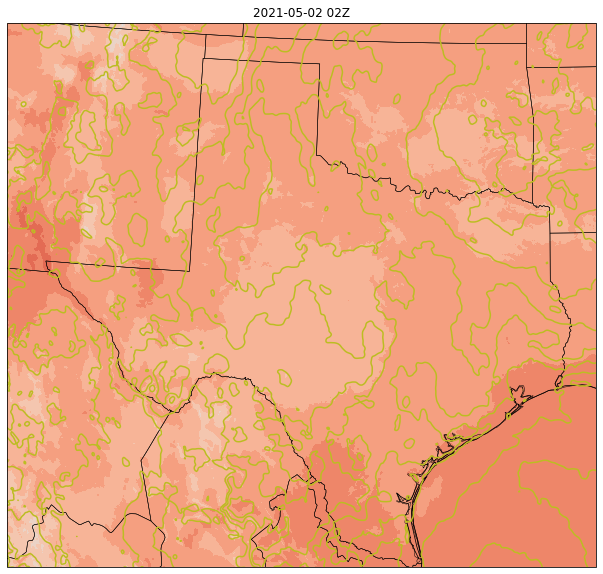

In [62]:
# Establish new figure with size
fig = plt.figure(figsize=(20,10))

# Format Figure
ax = fig.add_subplot(1,1,1,projection=plot_proj)
ax.set_extent((-107,-93,25.9,37), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'),linewidth=0.75)
ax.add_feature(cfeature.STATES,linewidth=0.5)

# Temperature Data
ax.contourf(temp.metpy.x, temp.metpy.y, temp - 273.15,
            transform=temp.metpy.cartopy_crs,
            levels=np.arange(-30,40,4),cmap='coolwarm')
# Theta_e
ax.contour(theta_e.metpy.x, theta_e.metpy.y, theta_e,
           levels=np.arange(240,400,4),colors='tab:olive',
           transform=theta_e.metpy.cartopy_crs)

plt.title(dt.strftime('%Y-%m-%d %HZ'))

# Save Figure into workbook
#plt.savefig("Realtime Surface Temp.png")

## METAR Analysis

In [63]:
# Meterological Data from TDS catalog
metar_cat = TDSCatalog('https://thredds-test.unidata.ucar.edu/thredds/catalog/noaaport/text/metar/catalog.xml')

In [64]:
# Metar dataset with specific date time 
metar_file = metar_cat.datasets.filter_time_nearest(dt).remote_open()

In [65]:
# Decode Metar data
metar_text = StringIO(metar_file.read().decode('ascii'))

In [66]:
# Surface data from Metar file add year and month data
sfc_data = parse_metar_file(metar_text, year=dt.year, month=dt.month)

In [67]:
# Establish units to Surface Data
sfc_units = sfc_data.units

In [68]:
# Display Surface data and units
sfc_units

{'station_id': None,
 'latitude': 'degrees',
 'longitude': 'degrees',
 'elevation': 'meters',
 'date_time': None,
 'wind_direction': 'degrees',
 'wind_speed': 'kts',
 'eastward_wind': 'kts',
 'northward_wind': 'kts',
 'current_wx1': None,
 'current_wx2': None,
 'current_wx3': None,
 'low_cloud_type': None,
 'low_cloud_level': 'feet',
 'medium_cloud_type': None,
 'medium_cloud_level': 'feet',
 'high_cloud_type': None,
 'high_cloud_level': 'feet',
 'highest_cloud_type': None,
 'highest_cloud_level:': None,
 'cloud_coverage': None,
 'air_temperature': 'degC',
 'dew_point_temperature': 'degC',
 'altimeter': 'inHg',
 'air_pressure_at_sea_level': 'hPa',
 'present_weather': None,
 'past_weather': None,
 'past_weather2': None}

In [69]:
# Convert Surface data from DF to Unit arrays
sfc_data = pandas_dataframe_to_unit_arrays(sfc_data,sfc_units)

In [70]:
# Collect air temperature data
sfc_data['air_temperature']

Magnitude,[19.0 18.0 18.0 ... 28.0 25.0 20.0]
Units,degree_Celsius


In [71]:
# Collect Wind component and velocity data
sfc_data['u'],sfc_data['v'] = mpcalc.wind_components(sfc_data['wind_speed'],sfc_data['wind_direction'])

In [72]:
locs = plot_proj.transform_points(ccrs.PlateCarree(),sfc_data['longitude'].m, sfc_data['latitude'].m)

In [73]:
# Reduce amount of points of data to clean plots
sfc_data_mask = mpcalc.reduce_point_density(locs[:,:2], 100000)

Plot Metar Data

Text(0.5, 1.0, '2021-05-02 02Z')

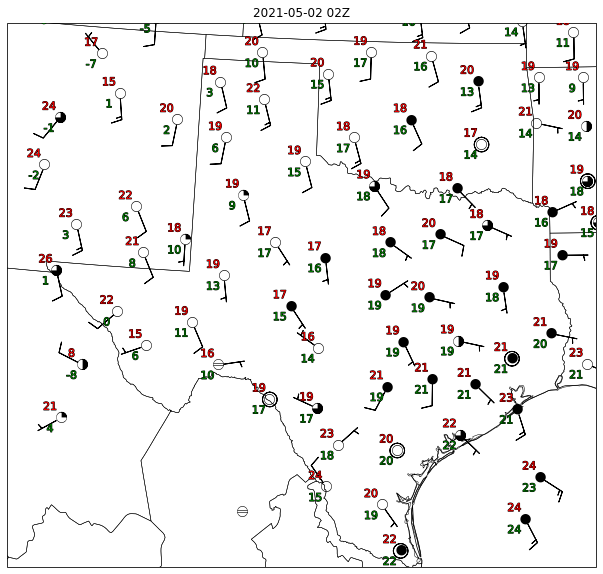

In [74]:
# New figure with size
fig = plt.figure(figsize=(20,10))

# Figure formating
ax = fig.add_subplot(1,1,1,projection=plot_proj)
ax.set_extent((-107,-93,25.9,37), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'),linewidth=0.75)
ax.add_feature(cfeature.STATES,linewidth=0.5)

# METAR Data
stn = mpplots.StationPlot(ax, sfc_data['longitude'][sfc_data_mask].m, sfc_data['latitude'][sfc_data_mask].m ,
                          transform=ccrs.PlateCarree(), fontsize=11, zorder=10, clip_on=True)
stn.plot_parameter('NW', sfc_data['air_temperature'][sfc_data_mask], color='red',
                   path_effects=[withStroke(linewidth=1, foreground = 'black')])
stn.plot_parameter('SW', sfc_data['dew_point_temperature'][sfc_data_mask], color='green',
                   path_effects=[withStroke(linewidth=1, foreground = 'black')])
stn.plot_symbol('C', sfc_data['cloud_coverage'][sfc_data_mask], mpplots.sky_cover)
stn.plot_barb(sfc_data['u'][sfc_data_mask], sfc_data['v'][sfc_data_mask])

plt.title(dt.strftime('%Y-%m-%d %HZ'))

# Save Figure into workbook
#plt.savefig("Metorlogical Plot.png")

## Comprehensive Plot of Satalite, RTMA, and Metar Data

Text(0.5, 1.0, '2021-05-02 02Z')

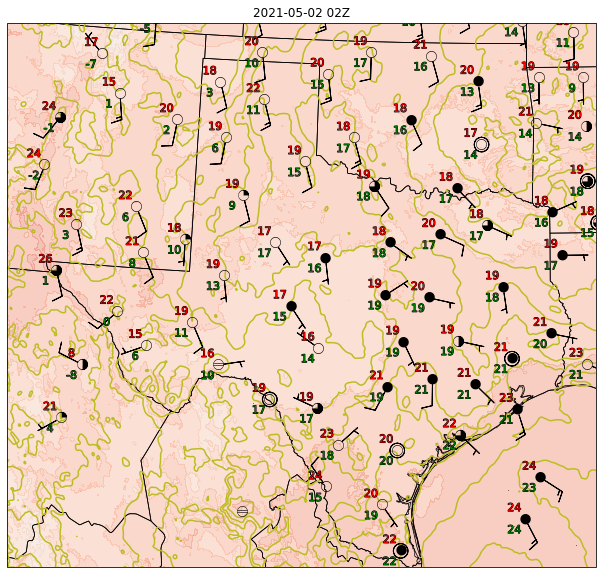

In [75]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1,projection=plot_proj)
ax.set_extent((-107,-93,25.9,37), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'),linewidth=0.75)
ax.add_feature(cfeature.STATES,linewidth=0.75)

# Satellite
# Adjust the regrid_shape to about 100 so that code can run faster
image_extent = (CMI.metpy.x[0], CMI.metpy.x[-1], CMI.metpy.y[0], CMI.metpy.y[-1])
ax.imshow(CMI, extent=image_extent, origin='lower', cmap='Greys_r',
          regrid_shape=1000, transform=CMI.metpy.cartopy_crs)

# Temperature
ax.contourf(temp.metpy.x, temp.metpy.y, temp - 273.15,
            transform=temp.metpy.cartopy_crs,
            levels=np.arange(-30,40,4),cmap='coolwarm' , alpha = 0.4)
# Theta_e
ax.contour(theta_e.metpy.x, theta_e.metpy.y, theta_e,
           levels=np.arange(240,400,4),colors='tab:olive',
           transform=theta_e.metpy.cartopy_crs)

## METARS
stn = mpplots.StationPlot(ax, sfc_data['longitude'][sfc_data_mask].m, sfc_data['latitude'][sfc_data_mask].m ,
                          transform=ccrs.PlateCarree(), fontsize=11, zorder=10, clip_on=True)
stn.plot_parameter('NW', sfc_data['air_temperature'][sfc_data_mask], color='red',
                   path_effects=[withStroke(linewidth=1, foreground = 'black')])
stn.plot_parameter('SW', sfc_data['dew_point_temperature'][sfc_data_mask], color='green',
                   path_effects=[withStroke(linewidth=1, foreground = 'black')])
stn.plot_symbol('C', sfc_data['cloud_coverage'][sfc_data_mask], mpplots.sky_cover)
stn.plot_barb(sfc_data['u'][sfc_data_mask], sfc_data['v'][sfc_data_mask])

plt.title(dt.strftime('%Y-%m-%d %HZ'))

# Save Figure into workbook
#plt.savefig("Combined Data Plot.png")